In [22]:
from janome.tokenizer import Tokenizer
import re
import zipfile
import urllib.request
import os.path,glob

#ダウンロードしたいURLを入力する
URL = 'https://www.aozora.gr.jp/cards/001779/files/56676_ruby_61995.zip'
#分かち書き作成ファイル
WAKATI = 'wakachi_text.txt'

def main():
    download_text = download(URL)
    text = convert(download_text)

    #分かち書き作成
    write_wakachi_text(word_analyze(text))

def write_wakachi_text(results):
    write_file = WAKATI
    with open(write_file, 'w', encoding='utf-8') as fp:
        fp.write("\n".join(results))

def word_analyze(text):
    t = Tokenizer()
    results = []
    lines = text.split("\r\n")

    for line in lines:
        tokens = t.tokenize(line)
        r = []
        for token in tokens:
            w = token.surface
            ps = token.part_of_speech
            hinshi = ps.split(',')[0]
            r.append(w)
        rl = (" ".join(r)).strip()
        print(rl)
        results.append(rl)

    return results

def convert(download_text):
    binarydata = open(download_text, 'rb').read()
    text = binarydata.decode('shift_jis')

    # ルビ、注釈などの除去
    text = re.split(r'\-{5,}', text)[2]
    text = re.split(r'底本：', text)[0]
    text = re.sub(r'《.+?》', '', text)
    text = re.sub(r'［＃.+?］', '', text)
    text = text.strip()
    return text

def download(url):
 # データファイルをダウンロードする
 zip_file = re.split(r'/', url)[-1]

 if not os.path.exists(zip_file):
     print('Download URL')
     print('URL:',url)
     urllib.request.urlretrieve(url, zip_file)
 else:
     print('Download File exists')

 # フォルダの生成
 dir, ext = os.path.splitext(zip_file)
 if not os.path.exists(dir):
     os.makedirs(dir)

 # zipファイルの展開
 zip_obj = zipfile.ZipFile(zip_file, 'r')
 zip_obj.extractall(dir)
 zip_obj.close()

 # zipファイルの削除
 os.remove(zip_file)

 # テキストファイルの抽出
 path = os.path.join(dir,'*.txt')
 list = glob.glob(path)
 return list[0]

if __name__ == "__main__":
    main()

Download URL
URL: https://www.aozora.gr.jp/cards/001779/files/56676_ruby_61995.zip
志摩 の 女王

東京 の まん中 に ある 有名 な デパート で 、 宝石 てん らん 会 が ひらか れ て い まし た 。 その デパート の 美術 部 主任 が 大 活動 を し て 、 日本 じゅう の 名 の ある 宝石 を かり集め 、 五 階 の てん らん 会場 に 、 きらびやか に ちん れつ し た の です 。
むかし の 華族 や 各 地方 の 名家 の 、 だい じ に し て いる 宝石 類 が 、 日本 に も こんなに 宝石 が あっ た の か と 、 おどろく ほど 集まっ た の です 。 宮 さま から の 出品 も いくつ か あり まし た 。
集まっ た 宝石 の 中 に は 、 じつに 、 いろいろ な 美術 品 が あり まし た 。 ダイヤモンド や ルビー を ちりばめ た 、 ヨーロッパ の ある 国 の 王冠 、 みごと な ダイヤ で ふち かざり を し た 、 イギリス 製 の 置時計 、 サファイア を ちりばめ た 黄金 の 手箱 など から 、 日本 の ま が たま 、 中国 の 白玉 の 美しい さ いく もの など 、 まるで 、 きらめく 星 に かこま れ た よう な ちん れつ 室 でし た 。
そこ に 集まっ た 宝石 は 、 ぜんぶ で 何 百 億 円 という おそろしい ね うち の もの で 、 その 中 の 一つ でも なくなっ たり 、 ぬすま れ たり し たら 、 たいへん です から 、 ちん れつ 室 に は 厳重 な か こい を し て 、 時間 以外 は 出入り口 に かぎ を かけ 、 その かぎ は 、 デパート の 美術 主任 が 、 は だ みはなさ ず 持っ て いる こと に し まし た 。 また 、 ちん れつ 室 の まわり に は 、 もと 警視庁 のう でき き の 刑事 だっ た 人 たち 十 人 を たのん で 、 夜 も 昼 も 見 はり を し て もらい まし た 。
ちん れつ 室 へ は いる 客 も 、 一時 に 五 十 人 と きめ て 、 あと

賊 と ばかり 思っ て い た の が 、 人形 だっ た の です 。 浮き ぶ くろ の よう に 、 いき を ふきこむ と 、 ふくれ て 人間 の 形 に なる ゴム 人形 だっ た の です 。 それ に 、 松村 の 黒い 背広 が きせ て あっ た の です 。
しかし 、 デパート の 屋上 から 、 風船 の 綱 に のぼっ て いっ た の は 、 たしかに 松村 でし た 。 その 生き た 人間 が 空 を 飛ん で いる うち に 、 どうして 人形 に かわっ て しまっ た の でしょ う か 。
読者 諸君 、 この 秘密 が お わかり です か 。 それ は つぎ の 章 で わかる の です が 、 それ まで に 、 諸君 も ひとつ 、 この なぞ を とい て み て は いかが です 。

パラシュート

水上 警察 の おまわりさん が 、 ゴム 人形 を しらべ て いる うち に 、 人形 の 手 に 、 白い 西洋 ぶ うとう が にぎら せ て ある の に 気がつき まし た 。 なん だろ う と 、 それ を ひらい て み ます と 、 中 に つぎ の よう な 手紙 が はいっ て い まし た 。


警察 の かたがた 、 ごく ろう さま 。 とらえ て みれ ば 人形 で 、 おき の どく だっ た ね 。 真珠 塔 は たしかに ちょうだい し た 。 おれ の 美術館 に 、 だい じ に かざっ て おく こと に する 。 これから も 、 まだまだ 、 宝石 を 集める つもり だ 。 そして 、 世界一 の 宝石 美術館 を つくる つもり だ 。 で は 、 さようなら 。 灰色 の 巨人


それ を 読ん で おまわりさん たち は 、 歯ぎしり を し て 、 くやし がり まし た 。 それにしても 、 「 灰色 の 巨人 」 と は なに もの でしょ う 。 宝石 職人 に ばけ た 賊 は 「 灰色 」 で も 、 「 巨人 」 で も あり ませ ん でし た 。 黒い 服 を き た 、 ふつう の 男 でし た 。 で は 、 あの 男 は 賊 の 手下 で 、 べつに 「 巨人 」 の よう な 大男 の 首領 が いる の でしょ う か 。 そ

賊 が 予告 し た 三月 七 日 の まえ の ばん に 、 大賞 堂 の 主人 と 支配人 は 、 店員 が みな ね て しまっ て から 、 そっと 起き だし て 、 明智 探偵 と 相談 し た とおり の こと を すませ まし た 。 つまり 、 ほんとう の 宝石 類 の はいっ た 古 新聞 の つつみ は 、 物置 部屋 の がらくた の 中 に ほうりこま れ 、 店 の 大 金庫 の 中 の たくさん の 、 りっぱ な サック に は 、 にせもの ばかり が 入れ られ た という わけ です 。
さて 、 いよいよ 、 三月 七 日 の 夜 が き まし た 。
その 夜 は 、 警視庁 から やってき た 三 人 の 刑事 が 、 ひとり は 、 店員 に ばけ て 、 店 の 売り場 に 立ち 、 ふたり は 、 夜 の 銀座 を さんぽ し て いる よう な 顔 を し て 、 大賞 堂 の ショー ウィンドー の 前 を 、 いっ たり き たり し て い まし た 。
それ と は べつに 、 明智 探偵 の ほう で も 、 どこ か で 見 はり し て いる はず です 。 しかし 、 明智 探偵 が 、 どんな 計略 を たて て いる か は 、 大賞 堂 の 主人 や 、 支配人 に も 、 わから ない の でし た 。
その 夜 は 、 どんな お客 さま が あっ て も 、 金庫 の 中 の 高価 な 宝石 は 見せ ない こと に し まし た 。 支配人 が 、 その こと を 店員 たち に いい つけ ます と 、 店員 たち も 、 灰色 の 巨人 の 予告 の こと は 、 よく 知っ て い まし た ので 、 その いい つけ を 、 かたく まもり まし た 。
店 に は 支配人 の ほか 七 人 の 店員 （ その うち の ひとり は 、 刑事 が ばけ た 、 にせ の 店員 です 。 ） が い まし た が 、 夜 が ふける に したがっ て 、 いまにも 怪盗 が やってくる の で は ない か と 、 みんな ビクビク もの です 。 なん で も ない お客 さま が はいっ て き て も 、 その たび に ハッ と し て 、 あい て の 顔 を 、 あ

大賞 堂 の 店 に あらわれ た 一寸法師 は 、 いったい なに もの でしょ う 。 かれ は どこ から どうして 、 にげ さる こと が でき た の でしょ う 。
また 、 モーターボート で にげ た 大男 は 、 はたして 、 灰色 の 巨人 な の でしょ う か 。 やがて 、 それら の 秘密 の とける とき が き ます 。

少年 探偵 団

大賞 堂 の 事件 が あっ て から 一 週間 ほど たっ た 、 ある 日 、 園井 正一 君 という 中学校 一 年生 の 少年 が 、 明智 探偵 事務所 へ 、 助手 の 小林 少年 を たずね て き まし た 。
園井 少年 は 、 小林 君 が 団長 を やっ て いる 少年 探偵 団 の 団員 な の です 。 小林 君 は 探偵 事務所 の じ ぶん の 部屋 へ 、 園井 君 を とおし まし た 。
小林 君 の 部屋 は 、 三 畳 ほど の せまい 洋室 です 。 大きな 机 と 本箱 と 、 いす が 三つ おい て あり ます 。 ふたり は 、 その いす にかけて 話 を し まし た 。
「 きみ 、 青い 顔 し て いる よ 。 なに か 心配 ごと で も ある の ？ 」
小林 君 が たずね ます と 、 園井 少年 は 、
「 うん 、 ひじょうに 心配 な こと が ある ん だ 。 それで 、 団長 に 相談 に き た ん だ よ 。 」
と いっ て 、 話し はじめ まし た 。
「 ぼく の おとうさん が 、 こん ばん 、 にじ の 宝冠 を 、 十 人 ほど の お 友だち に 、 見せる こと に なっ て いる ん だ 。 その 宝冠 は 、 戦争 の とき から 今 まで 、 ずっと 、 いなか に 疎開 し て あっ た ん だ が 、 それ を こんど 、 うち へ 持っ て かえっ た ん だ 。 そして 、 きょう は 、 ちょうど 、 おとうさん の 誕生 日 だ もん だ から 、 十 人 ばかり お客 さま が くる 。 みんな おとうさん の お 友だち だ よ 。 その お客 さま に 、 宝冠 を 見せる こと に なっ て いる ん だ 。 」
「 にじ の 宝冠 って 、 なん な の ？ 」
小林

少年 たち は 、 その 広い 境内 を 、 あちこち と 、 さがしまわり まし た 。 しかし 、 一寸法師 は 、 どこ に も い ない の です 。 あいつ は 、 木 のぼり が 、 うまい よう です から 、 ひょっとしたら 、 大きな 木 に のぼっ て 、 かくれ て いる の かも しれ ませ ん 。 しかし 、 何 十 本 とある 木 を 、 一 本 ずつ のぼっ て 、 さがす こと など 、 とても でき ませ ん 。 もう あきらめる ほか は ない の でしょ う 。
「 だが 、 もしか し たら 、 境内 を 通り ぬけ て 、 神社 の う ら の ほう へ 逃げ た かも しれ ない 。 そっち を さがし て みよ う 。 」
小林 団長 は 、 そう いっ て 、 さき に たっ て 、 う ら の 道 へ 出 て いき まし た 。
神社 の うら は 、 広い 原っぱ でし た 。 むこ う に 、 大きな テント が 、 はっ て あり ます 。 サーカス の テント です 。
四 人 は その ほう へ 行っ て み まし た 。 テント の 正面 に は 、 明るく 電灯 が つい て 、 二 とう の ゾウ と 、 たくさん の ウマ が つない で あり ます 。
入り口 の だい の 上 に 、 赤い しま の 服 を き た 人 が すわっ て 、 ばん を し て い まし た 。
「 おじさん 。 いま 、 ここ へ 、 一寸法師 が 、 こ なかっ た ？ 」
小林 君 が たずね まし た 。
「 なん だって ？ 　 一寸法師 だって ？ 」
赤い 服 の 男 が 、 びっくり し た よう に 、 少年 たち を 見おろし まし た 。
「 こび と だ よ 。 頭 が でっかく て 、 子ども みたい に 小さい やつ だ よ 。 神社 の ほう から 、 かけだし て こ なかっ た ？ 」
「 ふうん 、 この へん に 、 そんな やつ が いる の かい 。 見 なかっ た よ 。 もうこ ん や は 、 おしまい だ から 、 お もて に 立っ て いる お客 も なかっ た ので 、 見のがす はず は ない 。 そんな やつ 、 ここ へ は こ なかっ た よ 。 」
その

綱 の 上 の 、 にじ の 女王 は 、 下 から 刑事 が のぼっ て くる の を 見る と 、 いっそう 手足 を はやめ て 綱 を のぼり 、 たちまち 、 てんじょう に さ がっ て いる 、 ぶらんこ に のり まし た 。 そして 、 ぶらんこ の 棒 に こしかけ て 、 そこ に かぎ で ひっかけ て ある 下 から の 綱 を 、 とりはずそ う と し て い ます 。
ああ 、 あぶない 。 その かぎ を はずし たら 、 綱 の 中途 まで のぼっ て いる 刑事 が 、 まっ さ か さま に 、 つい らく する で は あり ませ ん か 。
刑事 も 、 それ に 気がつき まし た 。 か ぎをはずされるまえにのぼりきって 、 ぶらんこ に 、 とりつか なけれ ば なり ませ ん 。 かれ は 、 死にものぐるい に 綱 を のぼり まし た 。
そして 、 右手 を ぐっと のばし て 、 ぶらんこ に 、 つかまろ う と し た とき です 。
「 ワーッ 。 」
という 声 が 、 見物 せき から 、 おこり まし た 。 に じ の 女王 は 、 あやうい ところ で 、 かぎ を はずし た の です 。 刑事 の つかまっ て いる 綱 が 、 サーッ と 下 へ おち て いき まし た 。 刑事 は 、 二 十 メートル の 上 から 、 つい らく し た の です 。
瞬間 、 場内 は 、 はか ば の よう に 、 しいんと しずまり まし た 。 みんな が 声 を のん で 、 つい らく する 刑事 の からだ を 、 見つめ て い た の です 。
刑事 は 、 まっ さ か さま に 落ち て き まし た 。 そのまま 地面 に ぶっつかれ ば 、 気 ぜ つ する か 、 死ん で しまう か です 。 人びと は 手 に あせ を にぎり まし た 。
しかし 、 刑事 は 運 が よかっ た の です 。 ぶらんこ は 、 砂場 の 上 に はりつめ た 、 救命 網 の 上 に あり まし た 。 刑事 は その 網 に 落ち た の です 。 かれ の からだ は 、 太い 網 の 上 で 、 まるく なっ て 、 ぽん ぽん と 、 二 ― 三 度 、 はずみ まし

「 すると 、 やっぱり 、 この テント の どこ か に 、 かくれ て いる の かも しれ ない 。 そして 、 宝冠 の 女 も 、 まだ 神社 の 中 に かくれ て いる の かも しれ ない 。 じつに おもしろく なっ て き た 。 ぼく は こういう 犯罪 が すき だ よ 。 魔法つかい みたい な やつ が ね 。 それ について 、 ぼく は 、 ひとつ 考え が ある 。 その 考え を 、 やっ て みる つもり だ 。 きっと 三 人 とも 発見 し て みせる 。 」
明智 は 自信 あり げ に いう の でし た 。 それにしても 、 大男 と 、 一寸法師 と 宝冠 の 少女 は 、 どこ に どうして 、 かくれ て いる の でしょ う 。 また 、 明智 探偵 は 、 あれ ほど 捜索 し て も 、 わから なかっ た 三 人 を 、 いったい 、 どんな 方法 で 、 さがしだそ う という の でしょ う 。
あと で わかっ た の です が 、 三 人 は 、 じつに ふしぎ な 場所 に かくれ て い まし た 。 かれ ら は 、 いつも みんな の 目 の 前 に い た の です 。 それでいて 、 ぜったいに 発見 さ れ ない よう な 、 かくれ かた を し て い た の です 。 それ が わかっ た とき 、 読者 諸君 は 、 あっと おどろく に ちがい あり ませ ん 。 明智 探偵 で さえ も おどろい た の です 。 中村 警部 や 部下 の 警官 たち は 、 いっそう おどろい た の です 。
しかし この 秘密 は 、 あと の お たのしみ として 、 その まえ に 、 神社 から 町 へ 逃げだし た 巨 ゾウ が 、 どうして つかまっ た か という こと を 、 しるし て おか なけれ ば なり ませ ん 。

町 の ゾウ 狩り

八幡 神社 から 逃げだし た ゾウ は 、 夕 がた の 町 を 、 の そり の そり と 歩い て いき まし た 。
ラジオ が 、 ゾウ の 逃げ た こと を 、 いち早く つたえ た ので 、 その ちかく の 町 に は 、 ぱったり と 人通り が とだえ て しまい まし た 。 いつも は 、 にぎ

すると 、 大 グマ は 、 前足 で おり の と びら を 、 ガチャガチャ いわ せ て い まし た が 、 また ウオーッ と うなっ て 、 大きな からだ を 、 と びら に ぶっつけ た か と おもう と 、 それ が 、 パッ と ひらい た の です 。 おり の と びら が 、 おおきく ひらい て しまっ た の です 。
少年 たち は 、 わあ っと さけん で 逃げだし まし た 。
クマ は 、 ひらい た と びら から 、 おり の 外 へ とび出 し 、 いきなり 八幡 神社 の 森 の 方 へ かけ 出し て いき まし た 。
さっき は ゾウ が 逃げだし 、 やっと それ を つかまえ た か と おもう と 、 こんど は クマ です 。 また クマ 狩り を 、 はじめ なけれ ば なり ませ ん 。
小林 団長 は 、 よ びこをとり 出し て 、 ピリピリ … … と 、 ふきならし まし た 。 する と 、 テント の 入口 から 、 数 名 の 警官 が かけつけ て き まし た 。
「 たいへん です 。 クマ が おり を やぶっ て 逃げ た の です 。 ほら 、 あすこ へ 、 走っ て いき ます 。 」
それ を きく と 、 警官 たち は 、 腰 の ピストル を とり 出し て 、 走り だそ う と し まし た 。
「 ちょっと 、 待っ て ください 。 」
小林 君 は 、 警官 たち を とめ て 、 なにか ヒソヒソ と 、 ささやき まし た 。
「 ね 、 だから 、 ピストル を うっ ちゃ いけ ませ ん 。 手 で つかまえ て ください 。 そして … … 、 ね 、 わかっ た でしょ う 。 」
警官 たち は 、 へん な 顔 を し て 、
「 それ は 、 まちがい ない だろ う ね 。 」
と 、 ねん を おし まし た 。
「 だいじょうぶ です 。 明智 先生 の 命令 です 。 」
「 よしっ 、 それ じゃあ … … 。 」
と いう ので 、 警官 たち は 、 ピストル を 、 サック に しまい 、 そのまま 、 おそろしい いきおい で 、 かけだし まし た 。 小林 君 を はじめ 、 少年 たち も 、 その あと に

明智 探偵 の いう よう に 、 ほんとう の 犯人 が 、 ほか に いる と すれ ば 、 そいつ が 、 やみ に まぎれ て 、 園井 少年 を さらっ て いっ た の で は ない でしょ う か 。 もし そう だ と する と 、 こんど は 人間 が ぬすま れ た の です 。 「 にじ の 宝冠 」 どころ の さわぎ で は あり ませ ん 。 宝物 は とりかえし て も 、 だいじな 正一 君 が い なく なっ た の で は 、 園井 さん に もうしわけ が あり ませ ん 。
そこで 、 中村 警部 は 、 近く の 警察 から 、 おお ぜ い の 警官 を よび 集め て 、 探照灯 まで 持ち だし て 、 神社 の 森 や 、 その まわり を 、 長い あいだ さ が さ せ まし た 。 しかし 、 なん の かい も なかっ た の です 。 園井 少年 は 、 ついに 発見 さ れ なかっ た の です 。
明智 探偵 と 中村 警部 は 、 園井 君 の おとうさん を たずね て 、 「 にじ の 宝冠 」 を 返し 、 正一 君 の ゆくえ 不明 を 伝え まし た 。
「 じつに 、 もうしわけ あり ませ ん 。 ぼく が つい て い て 、 こんな こと に なり 、 おわび の ことば も あり ませ ん 。 少年 探偵 団 に 、 て がら を さ せよ う と し た の が 、 いけ なかっ た の です 。 まったく 、 ぼく の せき に ん です 。 しかし 、 この おわび に は 、 きっと 、 ほんとう の 犯人 を つかまえ て 、 正一 君 を とりもどし ます から 、 その こと は 、 ご 安心 ください 。 」
さすが の 名 探偵 、 明智 小五郎 も 、 この 失策 に は 、 ただ 、 わびる ほか は ない の でし た 。
さて 、 その あくる日 、 園井 さん は 、 差出人 の 書い て ない 一 通 の 手紙 を 、 うけとり まし た 。 封 を きっ て 読ん で みる と 、 そこ に は 、 つぎ の よう な 、 おそろしい 文句 が しるし て あり まし た 。


「 にじ の 宝冠 」 は たしかに お返し し た 。 その かわり

ちょうど その とき 、 見 はり の 男 は 、 よっぱらい と 取っ組み あっ て い た ので 、 まったく それ に 気づき ませ ん でし た 。 また 、 自動車 の 中 の ふたり も 、 むこ う の 取っ組み あい を 助け に いこ う か 、 どう しよ う か と 、 その 方 ばかり 見 て い た ので 、 やっぱり 小さな かげ ぼうし の こと は 、 すこし も 知ら なかっ た の です 。
小さな かげ ぼうし が 走り さ って しまう と 、 いま まで 取っ組み あっ て い た 、 よっぱらい が 、 とつぜん 、 さっと 身 を ひい て 、 そのまま 、 逃げる よう に 走り だし 、 見 はり の 男 が 、 あっけ に とら れ て いる うち に 、 むこ う の やみ の 中 へ 、 姿 を 消し て しまい まし た 。
あの よっぱらい と 、 小さな かげ ぼうし と は 、 な かま だっ た の でしょ う か 。 かげ ぼうし が 自動車 の 下 に もぐりこん で 、 なにか やる あいだ 、 見 はり の 男 の 注意 を 、 そらし て おく ため に 、 よっぱらい の まね を し て 、 けんか を 、 ふっかけ た の で は ない でしょ う か 。 もし そう だ と する と 、 あの よっぱらい とかげ ぼうし は 、 いったい 、 なに もの だっ た の でしょ う 。
それ は ともかく 、 いっぽう 、 園井 さん は 、 やく そく の 八 時 に なる と 、 「 にじ の 宝冠 」 を 、 明智 の おい て いっ た 黒 ぬり の 箱 に いれ て 、 それ を こわき に かかえ て 、 門 の 前 から 、 東 へ 百 メートル ほど 歩い て いき ます と 、 そこ に 、 ヘッドライト を 消し た 自動車 が とまっ て い まし た 。 それ は 、 さっき 、 よっぱらい が 、 けんか を し た 、 すこし あと の こと です 。
園井 さん が 自動車 に 近づく と 、 ヘッドライト が 、 パッ パッ と 、 二 ― 三 度 、 つい たり 、 消え たり し まし た 。 これ が 灰色 の 巨人 の 車 だ という 、 あ い

探偵 犬 は 、 しきりに 地面 を かぎ ながら 、 のろのろ と 、 国道 から わき道 へ まがっ て いき ます 。 やっぱり 明智 探偵 の いう と おり 、 その ほう に 、 コールタール の しずく が 、 たれ て いる らしい の です 。
しかし 、 その しずく は 、 だんだん 小さく なり 、 しずく と しずく の へだたり が 長く なっ て いく ので 、 シャーロック の 苦心 は ひと とおり で は あり ませ ん 。 長い あいだ まよっ た あと 、 やっと 、 におい を かぎつけ て 、 すこし ずつ 進ん で いく の です 。
そうして 、 三 百 メートル ほど 進ん だ とき 、 いよいよ 、 におい が なくなっ て しまっ た の か 、 シャーロック は 、 ぴったり 、 とまっ た まま 動か なく なっ て しまい まし た 。
「 こんな こと なら 、 もっと 大きな コールタール の かん を 、 つけ て おく ん だっ た ね 。 」
明智 探偵 は 、 ざんねんそうにつぶやきましたが 、 まだ 、 あきらめ られ ない らしく 、
「 ともかく 、 一度 、 おり て みよ う 。 そして 、 シャーロック の 綱 を 持っ て 、 この へん を 歩い て みよ う 。 」
と 、 小林 君 を うながし まし た 。
そこで 、 ふたり は 車 を おり 、 にせ 宝冠 の ふろしき づつみを 明智 が こわき に かかえ 、 イヌ の 綱 は 小林 少年 が 持っ て 、 シャー ロック の 進む まま に 、 その へん を 歩き はじめ まし た 。
そこ は 国道 から それ た 、 ひじょうに さびしい 場所 で 、 かた が わ は 畑 、 かた が わ は 大きな 森 に なっ て い まし た 。 それ も 平地 の 森 で は なく て 、 小山 の よう な 丘 で 、 ずいぶん 深い 森 です 。
シャー ロック は 、 その 森 に そっ て 、 のろのろ と 歩い て い まし た が 、 ある 場所 に くる と 、 なにか 、 ほか の におい を かぎつけ た らしく 、 いきなり 森 の 中 へ 、 ガサガサ と 、 はいっ て いく の です 。


「 灰色 の 巨人 の いみ が 、 わかっ た の だ 。 それ を われわれ は 、 人間 の あだな だ と ばかり 思っ て い た が 、 そう で は なかっ た 。 き さま たち 、 わる ものの 、 すみか の 名 だっ た 。 この コンクリート の 大仏 は 、 たしかに 灰色 の 巨人 に ちがい ない 。 こんな へん な ところ に 、 すん で いる だけ でも 、 き さま は 、 警察 に ひっぱら れる ね うち が ある 。 まして 、 いま 、 世間 を さわがせ て いる 宝石 どろ ぼう と 、 わかっ て いる の だ から 、 もう 、 のがれる こと は でき ない ぞ 。 見ろ 、 この 部屋 の ガラス の ケース の 中 の 宝石 は 、 みんな 、 き さま が 、 ぬすみ 出し た もの ばかり じゃ ない か 。 おとなしく 手錠 を うけろ っ 。 」
中村 警部 の 目 くば せ で 、 ひとり の 刑事 が 、 つかつか と 前 に すすみ 、 首領 に 手錠 を はめよ う と し まし た 。
「 待っ て くれ 。 こう なっ たら 、 おれ は 、 もう ひきょう な まね は し ない 。 だが 、 ちょっと いう こと が ある 。 この 二 階 に 子ども が ひとり 、 かくして ある ん だ 。 おれ や 部下 が ひっぱら れる と 、 その 子ども が 、 うえ 死 に する 。 こども を 助け出す あいだ 、 待っ て くれ 。 」
首領 は みょう な こと を いいだし まし た 。
「 うそ つけ 。 子ども は 、 きのう 、 にじ の 宝冠 と ひきかえ に 、 園井 さん に 返し た じゃ ない か 。 」
「 いや 、 園井 正一 じゃ ない 。 じつは 、 もう ひとり 子ども を 、 ぬすみだし た ん だ 。 その 子ども が 、 秘密 の 部屋 に かくし て ある 。 外 から かぎ が かけ て ある から 、 おれ たち が い なく なれ ば 、 子ども は うえ 死 に し て しまう の だ 。 」
「 その 秘密 の 部屋 は 、 どこ に ある の だ 。 」
「 二 階 の てんじょう の 上 だ 。 そこ は 、 おれ で なけれ

「 うん 、 それ は ざんねんだが 、 宝石 まで 持っ て にげる 、 よ ゆう が なかっ た 。 なあに 、 あれ ぐらい の 宝石 は 、 また すぐ に 、 ぬすん で みせる よ 。 なん に し て も 、 明智 の やつ を 、 あっ と いわ せ た の が 、 ゆか い だ 。 あいつ に は 、 いつも 、 さい ご に 、 やら れ て いる から ね 。 ところが 、 こんど は 、 そう は いか なかっ た 。 あいつ 、 さぞ くやし がっ て いる ところ だろ う て 。 」
「 いい きみ です ね 。 ところで 、 首領 、 明智 は どこ に い まし た か ね 。 首領 を とらえ に やってき た 人数 の なか に 、 明智 が い まし た か ね 。 」
「 いや 、 い なかっ た 。 それ が 、 ちょっと 、 ふしぎ な ん だ 。 やってき た の は 、 中村 警部 と 五 人 の 刑事 だけ だっ た 。 」
「 へえ 、 そいつ は 、 おかしい です ね 。 する と 、 あの 探偵 さん は 、 いま ごろ 、 どこ に いる ん でしょ う ？ 　 なんだか 、 うす きみがわるい です ね 。 」
「 うん 、 おれ も 、 それ が 、 なんとなく 、 気がかり な ん だ よ 。 」
ヘリコプター は 、 町 や 村 の 上 を 通ら ない よう に し て 、 山 づたいに 、 東京 都 の 西 の はじ の 奥多摩 の 方 に むかっ て 、 すすん で い まし た 。 目の下 に は 、 山々 の 、 こんもり しげっ た 森 と 、 あかい 地肌 と が 、 まだ ら も よう に なっ て 、 小さく 見え て い ます 。
「 首領 に うかがい ます が ね 。 デパート の 屋上 から アドバルーン で 逃げだし て から あと の 、 首領 の やり かた は 、 ひどく 、 はでやか でし た ね 。 宝石 を 手 に いれる こと より も 、 う で まえ を 、 見せびらかす の が 目的 だっ た よう に 見え ます ね 。 その あい て は 、 明智 小五郎 だっ た の じゃ あり ませ ん か 。 うらみ かさなる 明智 の やつ を 、 あっ 

In [2]:
import os
DATA_DIR = 'textfile2'
fname = '灰色の巨人.txt'
fname = os.path.join(DATA_DIR, fname)
with open(fname, encoding='utf-8') as f:
    text = f.read()
text

'志摩 の 女王\n\n東京 の まん中 に ある 有名 な デパート で 、 宝石 てん らん 会 が ひらか れ て い まし た 。 その デパート の 美術 部 主任 が 大 活動 を し て 、 日本 じゅう の 名 の ある 宝石 を かり集め 、 五 階 の てん らん 会場 に 、 きらびやか に ちん れつ し た の です 。\nむかし の 華族 や 各 地方 の 名家 の 、 だい じ に し て いる 宝石 類 が 、 日本 に も こんなに 宝石 が あっ た の か と 、 おどろく ほど 集まっ た の です 。 宮 さま から の 出品 も いくつ か あり まし た 。\n集まっ た 宝石 の 中 に は 、 じつに 、 いろいろ な 美術 品 が あり まし た 。 ダイヤモンド や ルビー を ちりばめ た 、 ヨーロッパ の ある 国 の 王冠 、 みごと な ダイヤ で ふち かざり を し た 、 イギリス 製 の 置時計 、 サファイア を ちりばめ た 黄金 の 手箱 など から 、 日本 の ま が たま 、 中国 の 白玉 の 美しい さ いく もの など 、 まるで 、 きらめく 星 に かこま れ た よう な ちん れつ 室 でし た 。\nそこ に 集まっ た 宝石 は 、 ぜんぶ で 何 百 億 円 という おそろしい ね うち の もの で 、 その 中 の 一つ でも なくなっ たり 、 ぬすま れ たり し たら 、 たいへん です から 、 ちん れつ 室 に は 厳重 な か こい を し て 、 時間 以外 は 出入り口 に かぎ を かけ 、 その かぎ は 、 デパート の 美術 主任 が 、 は だ みはなさ ず 持っ て いる こと に し まし た 。 また 、 ちん れつ 室 の まわり に は 、 もと 警視庁 のう でき き の 刑事 だっ た 人 たち 十 人 を たのん で 、 夜 も 昼 も 見 はり を し て もらい まし た 。\nちん れつ 室 へ は いる 客 も 、 一時 に 五 十 人 と きめ て 、 あと の 人 は 、 部屋 の 入口 に 列 を つくっ て 、 待っ て もらう こと に し まし た 。 です から 二つ の 出入り口 だけ でも 

In [3]:
from nltk.tokenize import word_tokenize
word_tokens = word_tokenize(text) 
stop=['、', '。','「','」','…']
clean_text = [w for w in word_tokens if not w in stop]

clean_text = []

for w in word_tokens: 
    if w not in stop: 
        clean_text.append(w)
        
stop_ja=["あそこ","あっ","あの","あのかた","あの人","あり","あります","ある","あれ","い","いう","います","いる","う","うち","え","お","および","おり","おります","か","かつて","から","が","き","ここ","こちら","こと","この","これ","これら","さ","さらに","し","しかし","する","ず","せ","せる","そこ","そして","その","その他","その後","それ","それぞれ","それで","た","ただし","たち","ため","たり","だ","だっ","だれ","つ","て","で","でき","できる","です","では","でも","と","という","といった","とき","ところ","として","とともに","とも","と共に","どこ","どの","な","ない","なお","なかっ","ながら","なく","なっ","など","なに","なら","なり","なる","なん","に","において","における","について","にて","によって","により","による","に対して","に対する","に関する","の","ので","のみ","は","ば","へ","ほか","ほとんど","ほど","ます","また","または","まで","も","もの","ものの","や","よう","より","ら","られ","られる","れ","れる","を","ん","何","及び","彼","彼女","我々","特に","私","私達","貴方","貴方方","まし","ませ","ぼく","きみ","さん"]

filtered_word = [w for w in clean_text if not w in stop_ja]


for w in clean_text: 
    if w not in stop_ja: 
        filtered_word.append(w) 
        
filtered_text=' '.join(filtered_word)
#Morphological analysis
import MeCab
m = MeCab.Tagger('')
parsed = m.parse(filtered_text)
filtered2_word = [x.split('\t')[0] for x in parsed.splitlines()[:-1] if x.split('\t')[1].split(',')[0] not in ['助詞', '助動詞','接続詞']]

In [4]:
from collections import Counter
freq = Counter(filtered2_word)
freq.most_common

<bound method Counter.most_common of Counter({'人': 334, '明智': 290, '少年': 284, '中': 274, '小林': 260, 'そう': 228, '見': 220, '探偵': 220, 'いっ': 218, '十': 214, 'ゾウ': 196, '君': 192, '園井': 190, '宝冠': 186, '上': 172, 'いき': 156, '巨人': 154, '大きな': 142, '灰色': 134, 'もう': 128, '顔': 128, '賊': 128, '三': 126, 'ひとり': 124, '男': 122, 'ま': 120, '二': 118, '警部': 116, '一': 114, '手': 114, 'いい': 112, 'あと': 108, '自動車': 108, 'しまい': 106, '警官': 106, '店員': 104, 'みんな': 104, 'ほう': 104, 'さま': 102, '一寸法師': 100, '五': 98, '宝石': 94, 'テント': 90, 'クマ': 90, '刑事': 88, '出': 86, '森': 86, '下': 84, '団長': 82, '女王': 80, '大': 80, 'かけ': 80, '目': 80, '方': 80, '四': 80, 'サーカス': 80, '中村': 80, 'かくれ': 78, 'つけ': 78, 'おい': 78, '見え': 76, '団': 76, '少女': 76, '神社': 76, '老人': 74, 'つい': 74, 'やつ': 74, 'イヌ': 74, '子ども': 74, 'いく': 72, '出し': 72, 'え': 72, 'しれ': 72, '正一': 72, 'さ': 70, '前': 70, 'なか': 70, 'むこ': 70, '木': 70, '声': 68, 'くれ': 68, 'まっ': 68, '大男': 68, '？': 68, '綱': 66, '玉': 66, 'ヘリコプター': 66, '首領': 66, 'すぐ': 64, 'どう': 64, 'おれ': 64, '真珠': 62, 'ろ': 62, 

In [5]:
import nltk
from nltk.probability import FreqDist
freqdist = nltk.FreqDist(filtered2_word)

!pip install japanize-matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.figure(figsize=(16,5),)
freqdist.plot(50)

<Figure size 1600x500 with 1 Axes>

In [8]:
from nltk.probability import FreqDist
Fdist = FreqDist(filtered2_word)
Fdist['巨人']

154

In [9]:
Fdist['明智']

290

In [11]:
Fdist['明智']/len(word_tokens)*100

0.6073680021781473

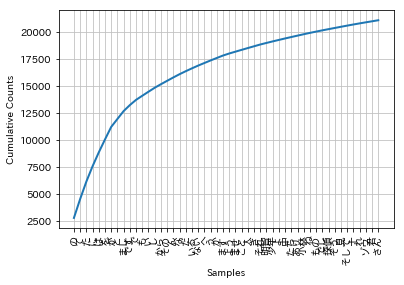

In [29]:
Fdist.plot(50, cumulative=True)

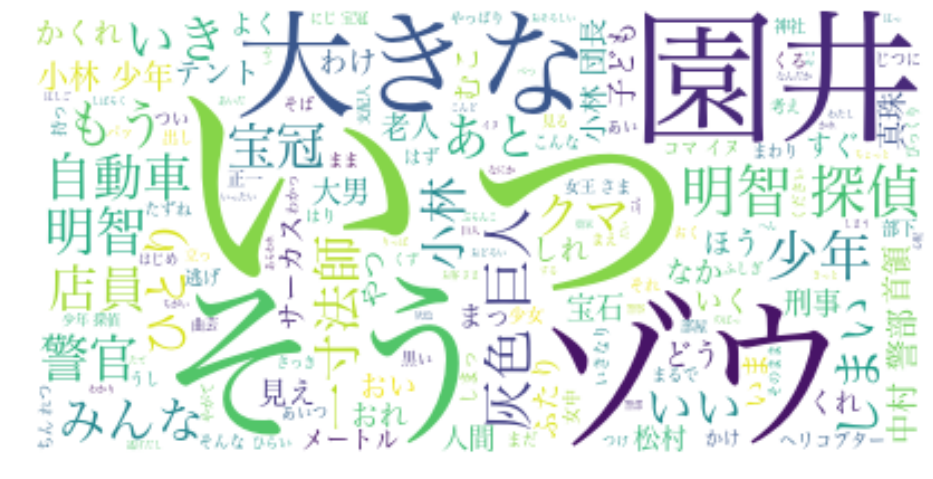

In [35]:
filtered_text=' '.join(filtered_word)
import os
os.path
!pip install wordcloud
import wordcloud
from wordcloud import WordCloud
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Morphological analysis
import MeCab
m = MeCab.Tagger('')
parsed = m.parse(filtered_text)
filtered2_text = ' '.join([x.split('\t')[0] for x in parsed.splitlines()[:-1] if x.split('\t')[1].split(',')[0] not in ['助詞', '助動詞','接続詞']])
#助詞　postpositional word
#助動詞　auxiliary verb
#接続詞　conjunction
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path='/System/Library/Fonts/ヒラギノ明朝 ProN.ttc',max_words=150,background_color="white").generate(filtered2_text)
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [36]:
wordcloud.to_file("textfile2/灰色の巨人.png")

In [12]:
lexical_diversity = len(set(word_tokens)) / len(word_tokens)
lexical_diversity

0.07066412549479549

In [13]:
len(set(word_tokens))

3374

In [14]:
len(word_tokens)

47747

In [15]:
parsed

'志摩\t名詞,固有名詞,人名,姓,*,*,志摩,シマ,シマ\nの\t助詞,連体化,*,*,*,*,の,ノ,ノ\n女王\t名詞,一般,*,*,*,*,女王,ジョオウ,ジョオー\n東京\t名詞,固有名詞,地域,一般,*,*,東京,トウキョウ,トーキョー\nの\t助詞,連体化,*,*,*,*,の,ノ,ノ\nまん中\t名詞,一般,*,*,*,*,まん中,マンナカ,マンナカ\nに\t助詞,格助詞,一般,*,*,*,に,ニ,ニ\nある\t動詞,自立,*,*,五段・ラ行,基本形,ある,アル,アル\n有名\t名詞,形容動詞語幹,*,*,*,*,有名,ユウメイ,ユーメイ\nな\t助動詞,*,*,*,特殊・ダ,体言接続,だ,ナ,ナ\nデパート\t名詞,一般,*,*,*,*,デパート,デパート,デパート\nで\t助詞,格助詞,一般,*,*,*,で,デ,デ\n、\t記号,読点,*,*,*,*,、,、,、\n宝石\t名詞,一般,*,*,*,*,宝石,ホウセキ,ホーセキ\nてん\t助詞,終助詞,*,*,*,*,てん,テン,テン\nらん\t名詞,一般,*,*,*,*,らん,ラン,ラン\n会\t名詞,接尾,一般,*,*,*,会,カイ,カイ\nが\t助詞,格助詞,一般,*,*,*,が,ガ,ガ\nひらか\t動詞,自立,*,*,五段・カ行イ音便,未然形,ひらく,ヒラカ,ヒラカ\nれ\t動詞,接尾,*,*,一段,連用形,れる,レ,レ\nて\t助詞,接続助詞,*,*,*,*,て,テ,テ\nい\t動詞,非自立,*,*,一段,連用形,いる,イ,イ\nまし\t助動詞,*,*,*,特殊・マス,連用形,ます,マシ,マシ\nた\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ\n。\t記号,句点,*,*,*,*,。,。,。\nその\t連体詞,*,*,*,*,*,その,ソノ,ソノ\nデパート\t名詞,一般,*,*,*,*,デパート,デパート,デパート\nの\t助詞,連体化,*,*,*,*,の,ノ,ノ\n美術\t名詞,一般,*,*,*,*,美術,ビジュツ,ビジュツ\n部\t名詞,接尾,一般,*,*,*,部,ブ,ブ\n主任\t名詞,一般,*,*,*,*,主任,シュニン,シュニン\nが\t助詞,格助詞,一般,*,*,*,が,ガ,ガ\n大\t接頭詞,名詞接続,*,*,*,*,大,ダイ,ダイ\n活動\t名詞,サ変接続,*,*,

In [17]:
import re
parts = [len(l.split()) for l in re.split(r'[?!。]', text) if l.strip()]

print(sum(parts)/len(parts))

19.696575639358475
